# Using BeautifulSoup4 to Scrape Google Patents using theirs IDs

## Install libraries

In [1]:
%pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install requests

  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached charset_normalizer-3.3.2-cp312-cp312-win_amd64.whl.metadata (34 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.2.3-py3-none-any.whl.metadata (6.5 kB)
  Using cached certifi-2024.8.30-py3-none-any.whl.metadata (2.2 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Using cached certifi-2024.8.30-py3-none-any.whl (167 kB)
Using cached charset_normalizer-3.3.2-cp312-cp312-win_amd64.whl (100 kB)
Using cached idna-3.10-py3-none-any.whl (70 kB)
Using cached urllib3-2.2.3-py3-none-any.whl (126 kB)
Note: you may need to restart the kernel to use updated packages.


In [10]:
%pip install pytesseract

  Using cached pytesseract-0.3.13-py3-none-any.whl.metadata (11 kB)
  Using cached pillow-10.4.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
Using cached pytesseract-0.3.13-py3-none-any.whl (14 kB)
Using cached pillow-10.4.0-cp312-cp312-win_amd64.whl (2.6 MB)
Note: you may need to restart the kernel to use updated packages.


In [11]:
%pip install pdf2image 

  Using cached pdf2image-1.17.0-py3-none-any.whl.metadata (6.2 kB)
Using cached pdf2image-1.17.0-py3-none-any.whl (11 kB)
Note: you may need to restart the kernel to use updated packages.


In [14]:
%pip install matplotlib


  Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.0-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.7-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.1.4-py3-none-any.whl.metadata (5.1 kB)
Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl (7.8 MB)
Using cached contourpy-1.3.0-cp312-cp312-win_amd64.whl (218 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 62.5 MB/s eta 0:00:00
Using cached kiwisolver-1.4.7-cp312-cp312-win_amd64.whl (55 kB)
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---------------------------------------- 12.6/12.6 MB 87.9 MB/s eta 0:00:00
Using cached pyparsing-3.1.4-py3-none-any.whl (104 kB)


# Scrape function

In [33]:
import requests
from bs4 import BeautifulSoup
def download_google_patent_pdf(patent_number, output_filename):
    url = f'https://patents.google.com/patent/{patent_number}/en'
    
    response = requests.get(url)
    
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        # Find the link to the PDF (search for the <a> tag with the href ending with '.pdf')
        pdf_link = soup.find('a', href=lambda href: href and href.endswith('.pdf'))
        
        if pdf_link and pdf_link['href']:
            pdf_url = pdf_link['href']
            
            pdf_response = requests.get(pdf_url)
            
            if pdf_response.status_code == 200:
                with open(output_filename, 'wb') as f:
                    f.write(pdf_response.content)
                print(f'PDF downloaded successfully and saved as {output_filename}')
            else:
                print(f'Failed to download PDF. Status code: {pdf_response.status_code}')
        else:
            print('PDF link not found on the page.')
    else:
        print(f'Failed to retrieve the patent page. Status code: {response.status_code}')


# OCR function

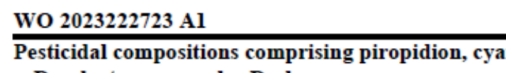

Extracted Text:
WO2023222723A1


In [56]:
import pytesseract
from pdf2image import convert_from_path
from PIL import Image
import matplotlib.pyplot as plt

def extract_text_from_pdf_bounding_box(pdf_path, page_number, bounding_box):
    pages = convert_from_path(pdf_path, first_page=page_number, last_page=page_number)
    
    if len(pages) == 0:
        print(f"No pages found in the PDF at {pdf_path}")
        return

    page_image = pages[0]

    cropped_image = page_image.crop(bounding_box)
    plt.imshow(cropped_image)
    plt.axis('off')
    plt.show()
    text = pytesseract.image_to_string(cropped_image)
    text = text.replace('Al', 'A1').replace(' ','')
    if 'A1' in text:
        text = text[0: text.find('A1') + 2]
    if 'A2' in text:
        text = text[0: text.find('A2') + 2]
    if 'A3' in text:
        text = text[0: text.find('A3') + 2]
    if 'A4' in text:
        text = text[0: text.find('A4') + 2]
    if 'B1' in text:
        text = text[0: text.find('B1') + 2]
    if 'B2' in text:
        text = text[0: text.find('B2') + 2]
    if 'C1' in text:
        text = text[0: text.find('C1') + 2]
    
    return text

pdf_path = 'data.pdf' 
page_number = 11  # The page number you want to process
bounding_box = (200, 200, 900, 290)  # Example bounding box (left, top, right, bottom)

text = extract_text_from_pdf_bounding_box(pdf_path, page_number, bounding_box)

print("Extracted Text:")
print(text)


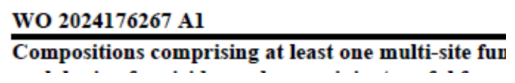

Extracted name: WO2024176267A1
PDF downloaded successfully and saved as output/WO2024176267A1.pdf


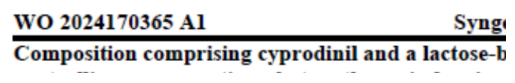

Extracted name: WO2024170365A1
PDF downloaded successfully and saved as output/WO2024170365A1.pdf


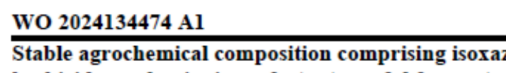

Extracted name: WO2024134474A1
PDF downloaded successfully and saved as output/WO2024134474A1.pdf


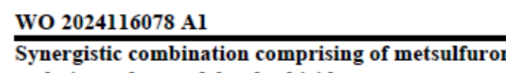

Extracted name: WO2024116078A1
PDF downloaded successfully and saved as output/WO2024116078A1.pdf


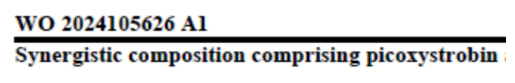

Extracted name: WO2024105626A1
PDF downloaded successfully and saved as output/WO2024105626A1.pdf


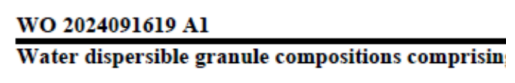

Extracted name: WO2024091619A1
PDF downloaded successfully and saved as output/WO2024091619A1.pdf


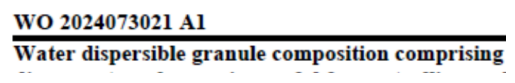

Extracted name: WO2024073021A1
PDF downloaded successfully and saved as output/WO2024073021A1.pdf


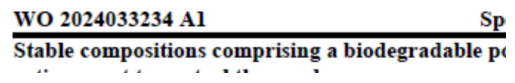

Extracted name: WO2024033234A1
PDF downloaded successfully and saved as output/WO2024033234A1.pdf


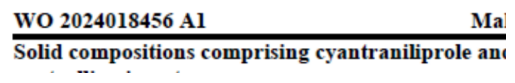

Extracted name: WO2024018456A1
PDF downloaded successfully and saved as output/WO2024018456A1.pdf


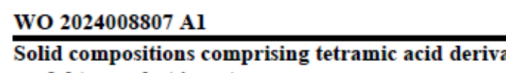

Extracted name: WO2024008807A1
PDF downloaded successfully and saved as output/WO2024008807A1.pdf


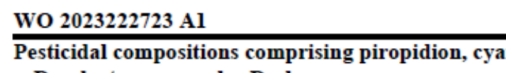

Extracted name: WO2023222723A1
PDF downloaded successfully and saved as output/WO2023222723A1.pdf


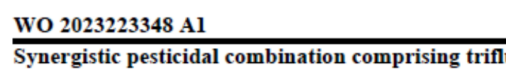

Extracted name: WO2023223348A1
PDF downloaded successfully and saved as output/WO2023223348A1.pdf


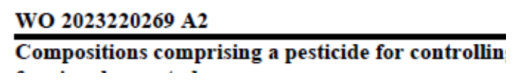

Extracted name: WO2023220269A2
PDF downloaded successfully and saved as output/WO2023220269A2.pdf


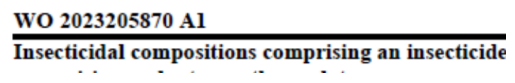

Extracted name: WO2023205870A1
PDF downloaded successfully and saved as output/WO2023205870A1.pdf


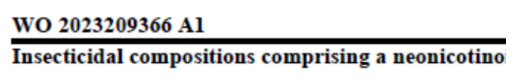

Extracted name: WO2023209366A1
PDF downloaded successfully and saved as output/WO2023209366A1.pdf


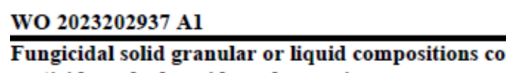

Extracted name: WO2023202937A1
PDF downloaded successfully and saved as output/WO2023202937A1.pdf


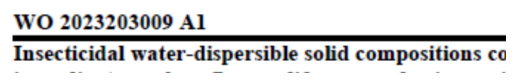

Extracted name: WO2023203009A1
PDF downloaded successfully and saved as output/WO2023203009A1.pdf


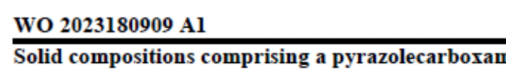

Extracted name: WO2023180909A1
PDF downloaded successfully and saved as output/WO2023180909A1.pdf


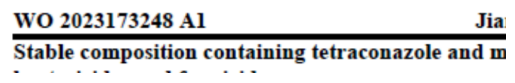

Extracted name: WO2023173248A1
PDF downloaded successfully and saved as output/WO2023173248A1.pdf


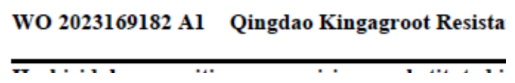

Extracted name: WO2023169182A1
PDF downloaded successfully and saved as output/WO2023169182A1.pdf


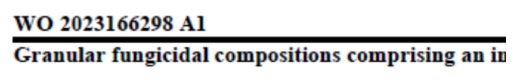

Extracted name: WO2023166298A1
PDF downloaded successfully and saved as output/WO2023166298A1.pdf


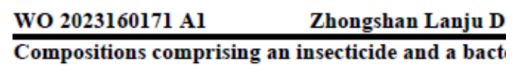

Extracted name: WO2023160171A1
PDF downloaded successfully and saved as output/WO2023160171A1.pdf


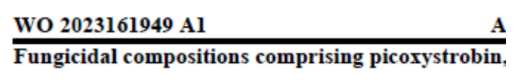

Extracted name: WO2023161949A1
PDF downloaded successfully and saved as output/WO2023161949A1.pdf


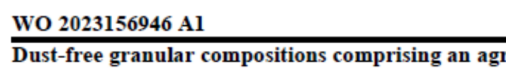

Extracted name: WO2023156946A1
PDF downloaded successfully and saved as output/WO2023156946A1.pdf


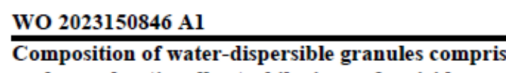

Extracted name: WO2023150846A1
PDF downloaded successfully and saved as output/WO2023150846A1.pdf


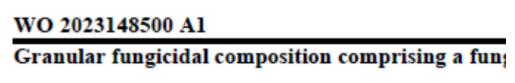

Extracted name: WO2023148500A1
PDF downloaded successfully and saved as output/WO2023148500A1.pdf


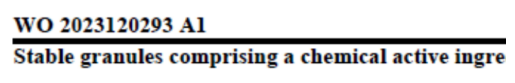

Extracted name: WO2023120293A1
PDF downloaded successfully and saved as output/WO2023120293A1.pdf


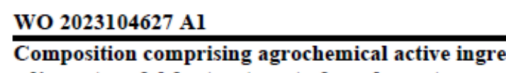

Extracted name: WO2023104627A1
PDF downloaded successfully and saved as output/WO2023104627A1.pdf


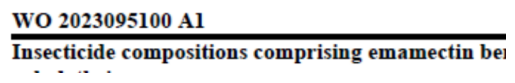

Extracted name: WO2023095100A1
PDF downloaded successfully and saved as output/WO2023095100A1.pdf


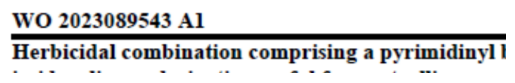

Extracted name: WO2023089543A1
PDF downloaded successfully and saved as output/WO2023089543A1.pdf


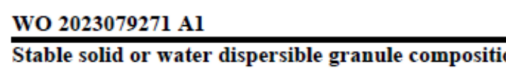

Extracted name: WO2023079271A1
PDF downloaded successfully and saved as output/WO2023079271A1.pdf


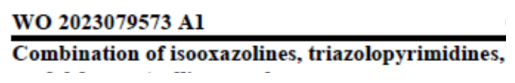

Extracted name: WO2023079573A1
PDF downloaded successfully and saved as output/WO2023079573A1.pdf


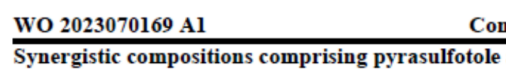

Extracted name: WO2023070169A1
PDF downloaded successfully and saved as output/WO2023070169A1.pdf


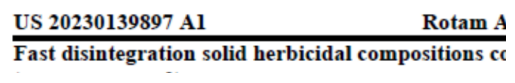

Extracted name: US20230139897A1
PDF downloaded successfully and saved as output/US20230139897A1.pdf


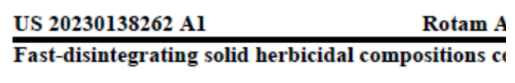

Extracted name: US20230138262A1
PDF downloaded successfully and saved as output/US20230138262A1.pdf


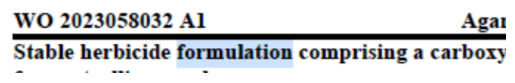

Extracted name: WO2023058032A1
PDF downloaded successfully and saved as output/WO2023058032A1.pdf


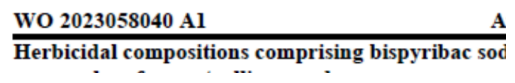

Extracted name: WO2023058040A1
PDF downloaded successfully and saved as output/WO2023058040A1.pdf


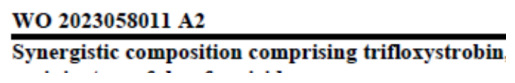

Extracted name: WO2023058011A2
PDF downloaded successfully and saved as output/WO2023058011A2.pdf


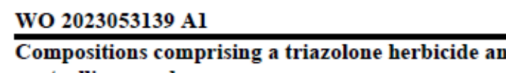

Extracted name: WO2023053139A1
PDF downloaded successfully and saved as output/WO2023053139A1.pdf


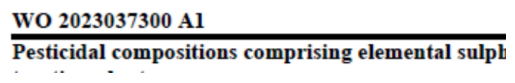

Extracted name: WO2023037300A1
PDF downloaded successfully and saved as output/WO2023037300A1.pdf


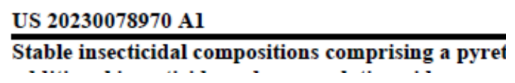

Extracted name: US20230078970A1
PDF downloaded successfully and saved as output/US20230078970A1.pdf


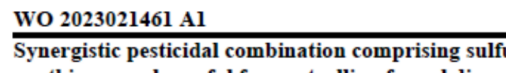

Extracted name: WO2023021461A1
PDF downloaded successfully and saved as output/WO2023021461A1.pdf


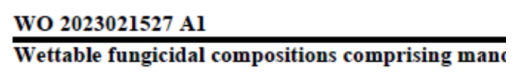

Extracted name: WO2023021527A1
PDF downloaded successfully and saved as output/WO2023021527A1.pdf


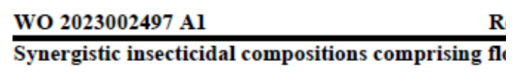

Extracted name: WO2023002497A1
PDF downloaded successfully and saved as output/WO2023002497A1.pdf


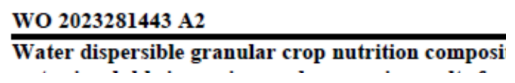

Extracted name: WO2023281443A2
PDF downloaded successfully and saved as output/WO2023281443A2.pdf


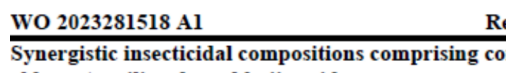

Extracted name: WO2023281518A1
PDF downloaded successfully and saved as output/WO2023281518A1.pdf


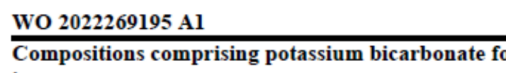

Extracted name: WO2022269195A1
PDF downloaded successfully and saved as output/WO2022269195A1.pdf


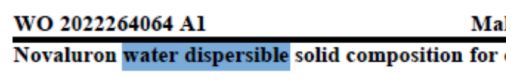

Extracted name: WO2022264064A1
PDF downloaded successfully and saved as output/WO2022264064A1.pdf


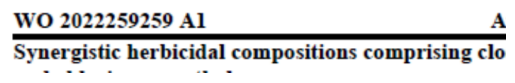

Extracted name: WO2022259259A1
PDF downloaded successfully and saved as output/WO2022259259A1.pdf


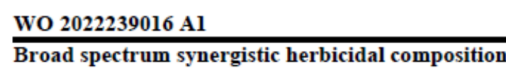

Extracted name: WO2022239016A1
PDF downloaded successfully and saved as output/WO2022239016A1.pdf


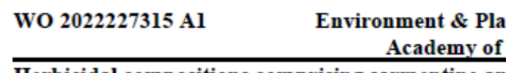

Extracted name: WO2022227315A1
PDF downloaded successfully and saved as output/WO2022227315A1.pdf


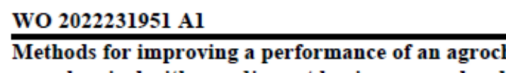

Extracted name: WO2022231951A1
PDF downloaded successfully and saved as output/WO2022231951A1.pdf


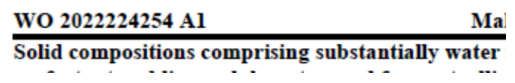

Extracted name: WO2022224254A1
PDF downloaded successfully and saved as output/WO2022224254A1.pdf


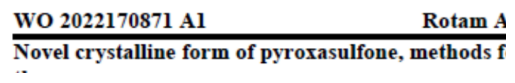

Extracted name: WO2022170871A1
PDF downloaded successfully and saved as output/WO2022170871A1.pdf


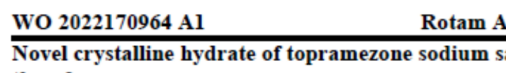

Extracted name: WO2022170964A1
PDF downloaded successfully and saved as output/WO2022170964A1.pdf


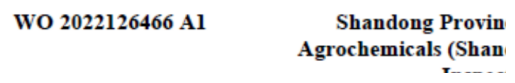

Extracted name: WO2022126466A1
PDF downloaded successfully and saved as output/WO2022126466A1.pdf


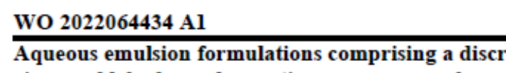

Extracted name: WO2022064434A1
PDF downloaded successfully and saved as output/WO2022064434A1.pdf


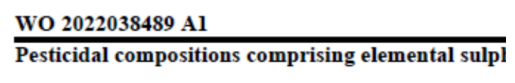

Extracted name: WO2022038489A1
PDF downloaded successfully and saved as output/WO2022038489A1.pdf


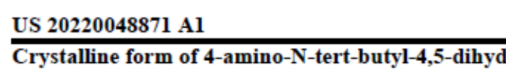

Extracted name: US20220048871A1
PDF downloaded successfully and saved as output/US20220048871A1.pdf


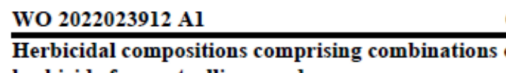

Extracted name: WO2022023912A1
PDF downloaded successfully and saved as output/WO2022023912A1.pdf


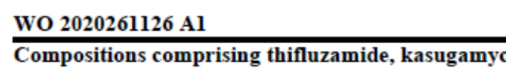

Extracted name: WO2020261126A1
PDF downloaded successfully and saved as output/WO2020261126A1.pdf


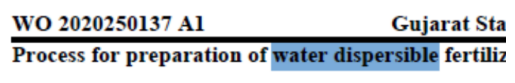

Extracted name: WO2020250137A1
PDF downloaded successfully and saved as output/WO2020250137A1.pdf
No pages found in the PDF at data.pdf
Extracted name: None


TypeError: can only concatenate str (not "NoneType") to str

In [58]:
for i in range(1, 1000):
    name = extract_text_from_pdf_bounding_box('data.pdf', i, (200, 200, 900, 290))
    print(f'Extracted name: {name}')
    if name == '':
        print(f'End of the pdf')
        break
    
    download_google_patent_pdf(name, 'output/' + name + '.pdf')